<a href="https://colab.research.google.com/github/SamiraAsadzadeh/Neural-network-exercises/blob/main/Building_a_Neural_Network_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **By: Samira Asadzadeh  40116341054541**

*   **Advisor:  Dr. Mr.Asadi**

*  **ISLAMIC AZAD UNIVERSITY SHIRAZ BRANCH Faculty of engineering**



# **Building a Neural Network from Scratch**
-------------------------------------------------

# **Import Library**

In [ ]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

# Bulid Classification Neuoral Network with a Single Hidden Layers

# **Create Dataset**

In [ ]:
def create_dataset():
  m = 400
  N = int(m/2)
  D = 2
  X = np.zeros((m,D))
  Y = np.zeros((m,1), dtype = ( np.uint8))
  a = 4
  for j in range(2):
    ix = range(N*j, N*(j+1))
    t = np.linspace(j*3.12, (j+1)*3.12, N) + np.random.randn(N)*0.2
    r = a*np.sin(4*t)+ np.random.randn(N)*0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j
  X = X.T
  Y = Y.T
  return X, Y

**X_train , y_train**

In [ ]:
X_train , y_train = create_dataset()

**Visualize DataSet**

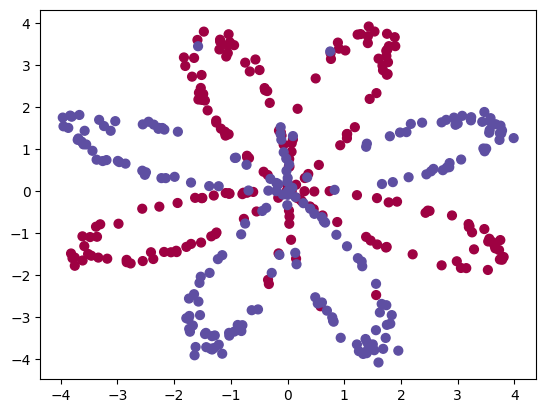

In [ ]:
#Visualize DataSet
import operator
from functools import reduce
plt.scatter(X_train[0, :], X_train[1, :], c= reduce(operator.add, y_train), s=40 , cmap = plt.get_cmap("Spectral"))


In [ ]:
shape_X = X_train.shape
shape_Y = y_train.shape
m = y_train.shape[1]
print ('The Shape of X_train is : ' + str(shape_X))
print ('The Shape of y_train is : ' + str(shape_Y))
print ('I have m = %d Traning Examples!' % (m))

The Shape of X_train is : (2, 400)
The Shape of y_train is : (1, 400)
I have m = 400 Traning Examples!


# **Layer Sizes**

In [ ]:
def layer_sizes():
  n_input = 2
  n_hidden = 4
  n_output = 1
  return ( n_input, n_hidden, n_output )

# **Initialize Parameters**

In [ ]:
def initialize_parameters(n_input, n_hidden, n_output):
  np.random.seed(2)

  W1 = np.random.randn(n_hidden, n_input) * 0.01
  b1 = np.zeros(shape = (n_hidden, 1))
  W2 = np.random.randn(n_output, n_hidden) * 0.01
  b2 = np.zeros(shape = (n_output, 1))

  parameters = {"W1":W1,
                "b1":b1,
                "W2":W2,
                "b2":b2}
  return parameters

# **Sigmoid & Relu Functions**

In [ ]:
def sigmoid(z):
  s = 1/(1+np.exp(-z))
  return s

In [ ]:
def relu(Z):
  s = np.maximum(0, Z)
  return s

**Plot Sigmoid & Relu**

Text(0.5, 1.0, 'ReLU Function')

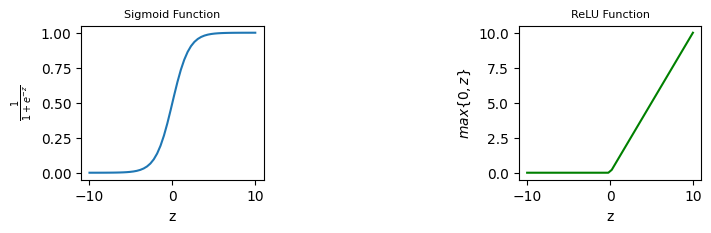

In [ ]:
# Plot sigmoid # plot leaky relu
z = np.linspace(-10, 10, 50)
A_sigmoid = sigmoid(z)
A_relu = relu(z)

plt.figure(figsize=(8, 2))
plt.subplot(1, 3, 1)
plt.plot(z, A_sigmoid)
#plt.plot(z, A_sigmoid * (1 - A_sigmoid), label = "Derivative")
#plt.legend(loc = "upper left")
plt.xlabel("z")
plt.ylabel(r"$\frac{1}{1 + e^{-z}}$")
plt.title("Sigmoid Function", fontsize = 8)

# plot relu
plt.subplot(1, 3, 3)
plt.plot(z, A_relu, 'g')
plt.xlabel("z")
plt.ylabel(r"$max\{0, z\}$")
plt.title("ReLU Function", fontsize = 8)


# **Forward Propagation**

In [ ]:
def forward_propagation(X, parameters):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  Z1 = np.dot(W1, X) + b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)

  cache = {"Z1":Z1,
           "A1":A1,
           "Z2":Z2,
           "A2":A2}
  return A2, cache


# **Cost Function (MSE)**

In [ ]:
def compute_cost(A2, Y, parameters):
  #m = Y.shape[1]
  W1 = parameters["W1"]
  W2 = parameters["W2"]
  logporobs = mean_squared_error(Y, A2)
  cost = np.squeeze(logporobs)
  return cost

# **Backward Propagation**

In [ ]:
def backward_propagation(parameters, cache, X, Y):
  m = X.shape[1]
  W1 = parameters["W1"]
  W2 = parameters["W2"]
  A1 = cache["A1"]
  A2 = cache["A2"]
  # gradiant dW1, db1, dW1, db2
  dZ2 = A2-Y
  dW2 = (1/m) * np.dot(dZ2, A1.T)
  db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
  dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1,2))
  dW1 = (1/m) * np.dot(dZ1, X.T)
  db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

  grads =  {"dW1":dW1,
           "db1":db1,
           "dW2":dW2,
           "db2":db2}
  return grads


# **Update Parameters**

In [ ]:
def update_parameters(parameters, grads, learnin_rate=1.2):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]

  W1 = W1 - learnin_rate * dW1
  b1 = b1 - learnin_rate * db1
  W2 = W2 - learnin_rate * dW2
  b2 = b2 - learnin_rate * db2

  parameters = {"W1":W1,
                "b1":b1,
                "W2":W2,
                "b2":b2}
  return parameters

# **Training Model**

In [ ]:
def nn_model(X, Y, num_iteration=10000, print_cost=False):
  np.random.seed(3)
  #print(layer_sizes()[0])
  n_x = layer_sizes()[0]
  n_h = layer_sizes()[1]
  n_y = layer_sizes()[2]

  parameters = initialize_parameters(n_x, n_h, n_y)
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  for i in range(0, num_iteration):
    A2, cache = forward_propagation(X, parameters)
    cost = compute_cost(A2, Y, parameters)
    grads = backward_propagation(parameters, cache, X, Y)
    parameters = update_parameters(parameters, grads)

    if print_cost and i % 1000 == 0:
      Y_prediction_train = predict(parameters, X_train)
      print ("Cost after iteretion %i: %f" %(i, cost), 'Train Accuracy: %d' % float((np.dot(y_train,Y_prediction_train.T) + np.dot(1-y_train,1-Y_prediction_train.T))/float(y_train.size)*100) + '%' )

      #print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))


  return parameters


# **Prediction**

In [ ]:
#prediction
def predict(parameters, X):
  A2, cache = forward_propagation(X, parameters)
  predictions = np.round(A2) #threshold

  return predictions


**Plot Decision Boundary**

In [ ]:
def plot_decision_boundary(model, X, y):

    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')

    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Cost after iteretion 0: 0.249950 Train Accuracy: 57%
Cost after iteretion 1000: 0.088930 Train Accuracy: 89%
Cost after iteretion 2000: 0.080506 Train Accuracy: 89%
Cost after iteretion 3000: 0.075208 Train Accuracy: 90%
Cost after iteretion 4000: 0.073205 Train Accuracy: 90%
Cost after iteretion 5000: 0.071981 Train Accuracy: 90%
Cost after iteretion 6000: 0.071094 Train Accuracy: 90%
Cost after iteretion 7000: 0.070404 Train Accuracy: 90%
Cost after iteretion 8000: 0.071533 Train Accuracy: 90%
Cost after iteretion 9000: 0.071202 Train Accuracy: 90%


Text(0.5, 1.0, 'Decision Boundary for hidden layer size4')

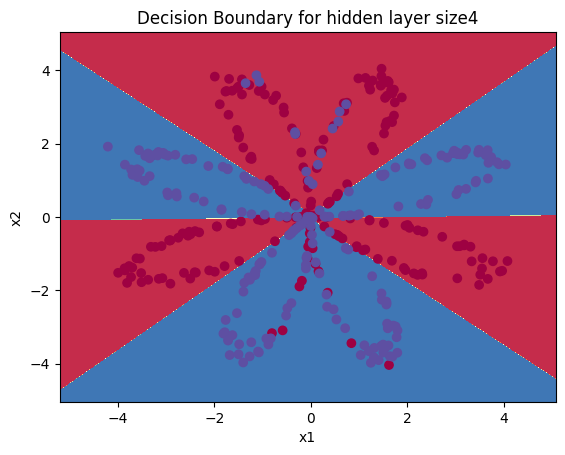

In [ ]:
parameters = nn_model(X_train, y_train, num_iteration=10000, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X_train, y_train)
plt.title("Decision Boundary for hidden layer size" + str(4))

# Bulid Classification Neuoral Network with a Single Hidden Layers

# **Create Dataset**

In [ ]:
def create_dataset():
  m = 400
  N = int(m/2)
  D = 2
  X = np.zeros((m,D))
  Y = np.zeros((m,1), dtype = ( np.uint8))
  a = 4
  for j in range(2):
    ix = range(N*j, N*(j+1))
    t = np.linspace(j*3.12, (j+1)*3.12, N) + np.random.randn(N)*0.2
    r = a*np.sin(4*t)+ np.random.randn(N)*0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j
  X = X.T
  Y = Y.T
  return X, Y

**X_train , y_train**

In [ ]:
X_train , y_train = create_dataset()

**Visualize DataSet**

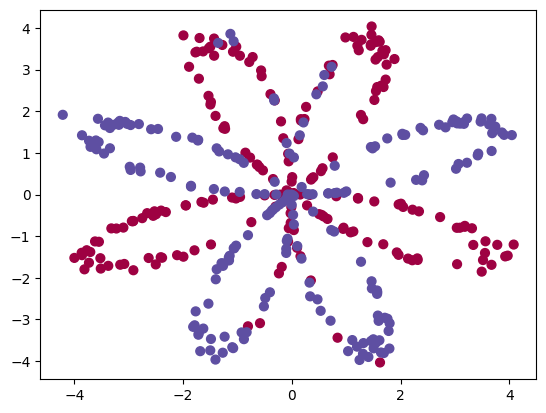

In [ ]:
#Visualize DataSet
import operator
from functools import reduce
plt.scatter(X_train[0, :], X_train[1, :], c= reduce(operator.add, y_train), s=40 , cmap = plt.get_cmap("Spectral"))


In [ ]:
shape_X = X_train.shape
shape_Y = y_train.shape
m = y_train.shape[1]
print ('The Shape of X_train is : ' + str(shape_X))
print ('The Shape of y_train is : ' + str(shape_Y))
print ('I have m = %d Traning Examples!' % (m))

The Shape of X_train is : (2, 400)
The Shape of y_train is : (1, 400)
I have m = 400 Traning Examples!


# **Layer Sizes**

In [ ]:
def layer_sizes():
  n_input = 2
  n_hidden = 4
  n_hidden2 = 4
  n_output = 1
  return ( n_input, n_hidden, n_hidden2, n_output )

# **Initialize Parameters**

In [ ]:
def initialize_parameters(n_input, n_hidden, n_hidden2, n_output):
  np.random.seed(2)

  W1 = np.random.randn(n_hidden, n_input) * 0.01
  b1 = np.zeros(shape = (n_hidden, 1))

  W2 = np.random.randn(n_hidden2, n_hidden) * 0.01
  b2 = np.zeros(shape = (n_hidden2, 1))

  W3 = np.random.randn(n_output, n_hidden2) * 0.01
  b3 = np.zeros(shape = (n_output, 1))

  parameters = {"W1":W1,
                "b1":b1,
                "W2":W2,
                "b2":b2,
                "W3":W3,
                "b3":b3,}
  return parameters

# **Sigmoid & Relu Functions**

In [ ]:
def sigmoid(z):
  s = 1/(1+np.exp(-z))
  return s

In [ ]:
def relu(Z):
  s = np.maximum(0, Z)
  return s

**Plot Sigmoid & Relu**

Text(0.5, 1.0, 'ReLU Function')

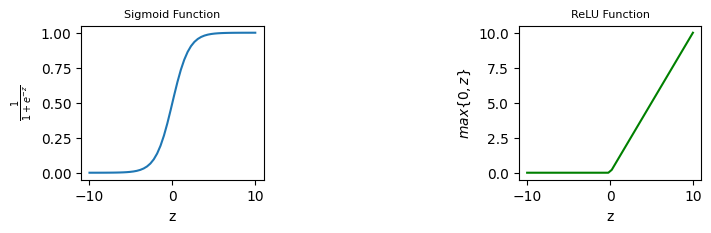

In [ ]:
# Plot sigmoid & relu
z = np.linspace(-10, 10, 50)
A_sigmoid = sigmoid(z)
A_relu = relu(z)

plt.figure(figsize=(8, 2))
plt.subplot(1, 3, 1)
plt.plot(z, A_sigmoid)
#plt.plot(z, A_sigmoid * (1 - A_sigmoid), label = "Derivative")
#plt.legend(loc = "upper left")
plt.xlabel("z")
plt.ylabel(r"$\frac{1}{1 + e^{-z}}$")
plt.title("Sigmoid Function", fontsize = 8)

# plot relu
plt.subplot(1, 3, 3)
plt.plot(z, A_relu, 'g')
plt.xlabel("z")
plt.ylabel(r"$max\{0, z\}$")
plt.title("ReLU Function", fontsize = 8)


# **Forward Propagation**

In [ ]:
def forward_propagation(X, parameters):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  W3 = parameters["W3"]
  b3 = parameters["b3"]

  Z1 = np.dot(W1, X) + b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = np.tanh(Z2)
  Z3 = np.dot(W3, A2) + b3
  A3 = sigmoid(Z3)

  cache = {"Z1":Z1,
           "A1":A1,
           "Z2":Z2,
           "A2":A2,
           "Z3":Z3,
           "A3":A3}
  return A3, cache


# **Cost Function (MSE)**

In [ ]:
def compute_cost(A3, Y, parameters):
  #m = Y.shape[1]
  W1 = parameters["W1"]
  W2 = parameters["W2"]
  W3 = parameters["W3"]
  logporobs = mean_squared_error(Y, A3)
  cost = np.squeeze(logporobs)
  return cost

# **Backward Propagation**

In [ ]:
def backward_propagation(parameters, cache, X, Y):
  m = X.shape[1]
  W1 = parameters["W1"]
  W2 = parameters["W2"]
  W3 = parameters["W3"]
  A1 = cache["A1"]
  A2 = cache["A2"]
  A3 = cache["A3"]
  # gradiant dW1, db1, dW2, db2, dW3, db3

  dZ3 = A3 - Y
  dW3 = 1./m * np.dot(dZ3, A2.T)
  db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)

  dA2 = np.dot(W3.T, dZ3)
  dZ2 = np.multiply(dA2, np.int64(A2 > 0))
  dW2 = 1./m * np.dot(dZ2, A1.T)
  db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)

  dA1 = np.dot(W2.T, dZ2)
  dZ1 = np.multiply(dA1, np.int64(A1 > 0))
  dW1 = 1./m * np.dot(dZ1, X.T)
  db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)



  grads =  {"dW1":dW1,
           "db1":db1,
           "dW2":dW2,
           "db2":db2,
           "dW3":dW3,
           "db3":db3}

  return grads


# **Update Parameters**

In [ ]:
def update_parameters(parameters, grads, learnin_rate=1.2):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  W3 = parameters["W3"]
  b3 = parameters["b3"]

  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]
  dW3 = grads["dW3"]
  db3 = grads["db3"]

  W1 = W1 - learnin_rate * dW1
  b1 = b1 - learnin_rate * db1
  W2 = W2 - learnin_rate * dW2
  b2 = b2 - learnin_rate * db2
  W3 = W3 - learnin_rate * dW3
  b3 = b3 - learnin_rate * db3

  parameters = {"W1":W1,
                "b1":b1,
                "W2":W2,
                "b2":b2,
                "W3":W3,
                "b3":b3}

  return parameters

# **Training Model**

In [ ]:
def nn_model(X, Y, num_iteration=10000, print_cost=False):
  np.random.seed(3)
  #print(layer_sizes()[0])
  n_x = layer_sizes()[0]
  n_h = layer_sizes()[1]
  n_h2 = layer_sizes()[2]
  n_y = layer_sizes()[3]

  parameters = initialize_parameters(n_x, n_h, n_h2, n_y)
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  W3 = parameters["W3"]
  b3 = parameters["b3"]

  for i in range(0, num_iteration):
    A3, cache = forward_propagation(X, parameters)
    cost = compute_cost(A3, Y, parameters)
    grads = backward_propagation(parameters, cache, X, Y)
    parameters = update_parameters(parameters, grads)

    if print_cost and i % 1000 == 0:
      Y_prediction_train = predict(parameters, X_train)
      print ("Cost after iteretion %i: %f" %(i, cost), 'Train Accuracy: %d' % float((np.dot(y_train,Y_prediction_train.T) + np.dot(1-y_train,1-Y_prediction_train.T))/float(y_train.size)*100) + '%' )

      #print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))


  return parameters


# **Prediction**

In [ ]:
#prediction
def predict(parameters, X):
  A3, cache = forward_propagation(X, parameters)
  predictions = np.round(A3) #threshold

  return predictions


**Plot Decision Boundary**

In [ ]:
def plot_decision_boundary(model, X, y):

    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')

    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Cost after iteretion 0: 0.250000 Train Accuracy: 50%
Cost after iteretion 1000: 0.232145 Train Accuracy: 60%
Cost after iteretion 2000: 0.212119 Train Accuracy: 65%
Cost after iteretion 3000: 0.217733 Train Accuracy: 64%
Cost after iteretion 4000: 0.225924 Train Accuracy: 62%
Cost after iteretion 5000: 0.212562 Train Accuracy: 66%
Cost after iteretion 6000: 0.221699 Train Accuracy: 60%
Cost after iteretion 7000: 0.245039 Train Accuracy: 55%
Cost after iteretion 8000: 0.221533 Train Accuracy: 62%
Cost after iteretion 9000: 0.241239 Train Accuracy: 57%


Text(0.5, 1.0, 'Decision Boundary for hidden layer size2,4')

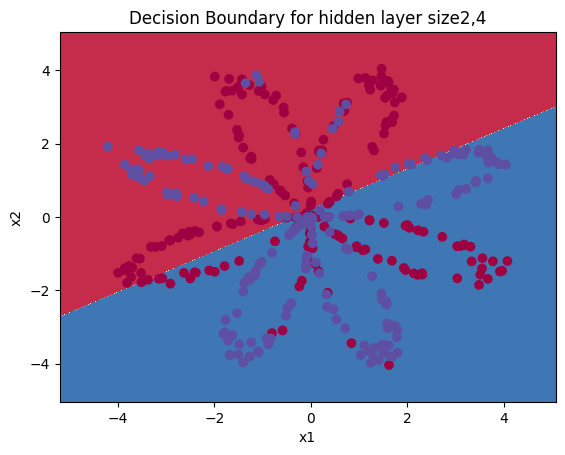

In [ ]:
parameters = nn_model(X_train, y_train, num_iteration=10000, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X_train, y_train)
plt.title("Decision Boundary for hidden layer size" + str(2) +',' + str(4))